# Table of Contents

1. [Models with NLTK](#1-bullet) <br>
    I - [Preprocessing](#2-bullet) <br>
    II - [Bag of words](#3-bullet) <br>
    III - [Word2vec](#4-bullet) <br>
    IV - [BERT](#5-bullet) <br>
    V - [Universal Sentence Encoder (USE)](#6-bullet) <br>
    <br>
    
2. [Models with Spacy](#7-bullet) <br>
    I - [Preprocessing](#8-bullet) <br>
    II - [Bag of words](#9-bullet) <br>
    III - [Spacy word vectors](#10-bullet) <br>
    <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
import logging
import torch

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from wordcloud import WordCloud

from sklearn import cluster, metrics
from sklearn import manifold, decomposition

from Functions import *

C:\Users\robin\anaconda3\envs\NLP\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('raw_text_data.csv', sep=',')

In [3]:
data.shape

(1050, 15)

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [7]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [8]:
description = data['description']

In [9]:
description

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [10]:
data['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [11]:
# Our target will be the primary category of each product, let's extract it

data['primary_category'] = data['product_category_tree'].apply(lambda p : p.replace('[', '').replace('"', '').split('>>')[0].strip())

In [12]:
data['primary_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

# 1. Models with NLTK <a class="anchor" id="1-bullet"></a>

## I - Preprocessing <a class="anchor" id="2-bullet"></a>

In [13]:
raw_corpus = " ".join(data['description'])

In [14]:
raw_corpus[:1000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [15]:
tmp = pd.Series(tokenizer_fct(raw_corpus)).value_counts()
tmp

.              4259
,              3133
of             1662
and            1167
the            1015
               ... 
Include           1
Protocols         1
attachment.       1
cleaner           1
Rs.1333           1
Length: 8086, dtype: int64

In [16]:
# Looking number of words and unique words before preprocessing

print("Number of words : {:,}".format(len(tokenizer_fct(raw_corpus))))
print("Number of unique words : {:,}".format(len(set(tokenizer_fct(raw_corpus)))))

Number of words : 91,336
Number of unique words : 8,086


In [17]:
# Setting list of unique words
list_rare_words = list(tmp[tmp == 1].index)

In [18]:
len(list_rare_words)

2841

In [19]:
# Processing

test_corpus = process_text(raw_corpus, rejoin=True, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem="lem", eng_words=None)

In [20]:
# Looking number of words and unique words after preprocessing

print("Number of words : {:,}".format(len(tokenizer_fct(test_corpus))))
print("Number of unique words : {:,}".format(len(set(tokenizer_fct(test_corpus)))))

Number of words : 50,389
Number of unique words : 3,636


In [21]:
tmp = pd.Series(tokenizer_fct(test_corpus)).value_counts()
tmp

product     864
free        618
buy         581
delivery    567
shipping    564
           ... 
tiddly        1
dco           1
thrade        1
wink          1
brillare      1
Length: 3636, dtype: int64

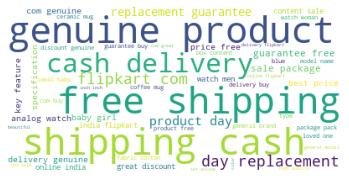

In [22]:
# Visualization with wordcloud

wordcloud = WordCloud(background_color='white', 
                      stopwords=[], 
                      max_words=50).generate(test_corpus)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
# Looking distribution of lenghts

data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=False, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem="lem", eng_words=None))
data['length_processed_text'] = data['processed_text'].apply(len)
data['length_processed_text'].describe()

count    1050.000000
mean       47.989524
std        43.335555
min         9.000000
25%        20.000000
50%        29.000000
75%        62.750000
max       318.000000
Name: length_processed_text, dtype: float64

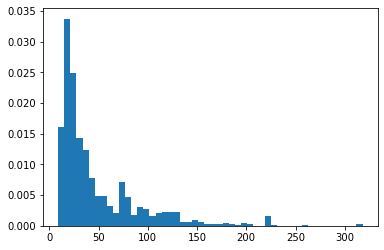

In [24]:
plt.hist(data['length_processed_text'], bins=50, density=True)
plt.show()

In [25]:
# Application on the data set

data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=True, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem="lem", eng_words=None))
data['processed_text_dl'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=False, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem=None, eng_words=None))

# II - Bag of words <a class="anchor" id="3-bullet"></a>

In [26]:
l_cat = list(set(data['primary_category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['primary_category'])) for i in range(len(data))]

catégories :  ['Beauty and Personal Care', 'Baby Care', 'Kitchen & Dining', 'Watches', 'Home Decor & Festive Needs', 'Home Furnishing', 'Computers']


In [27]:
# creating bag of words (CountVectorizer and Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'processed_text'
cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])  
ctf_transform = ctf.transform(data[feat])

In [28]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)

CountVectorizer : 
-----------------
ARI :  0.4123 time :  18.0

Tf-idf : 
--------
ARI :  0.4121 time :  17.0


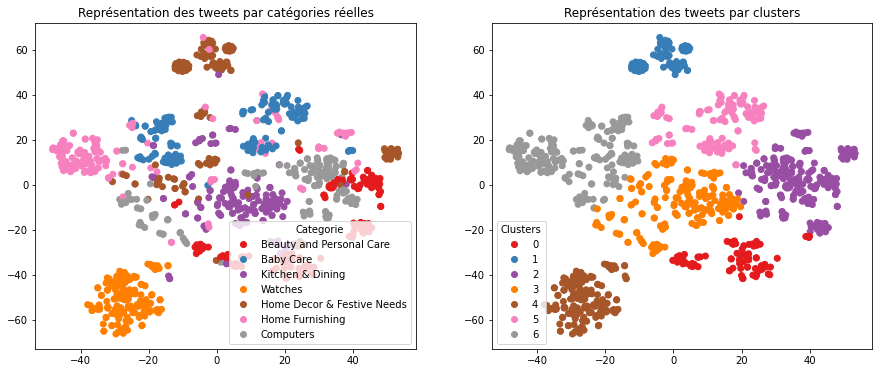

ARI :  0.4121


In [29]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

## III - Word2vec <a class="anchor" id="4-bullet"></a>

In [30]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

### a. Building Word2Vec model

In [31]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['processed_text'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [32]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3634
Word2Vec trained


In [33]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3635


### b. Creation of embedding matrix

In [34]:
print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3635, 300)


### c. Creation of embedding model

In [35]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 24, 300)           1090500   
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
Total params: 1,090,500
Trainable params: 1,090,500
Non-trainable params: 0
_________________________________________________________________


### d. Executing model

In [36]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 300)

In [37]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI :  0.2689 time :  16.0


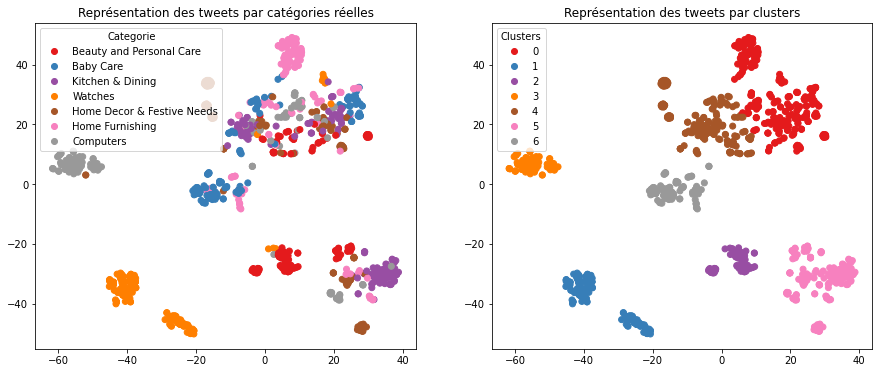

ARI :  0.2689


In [38]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

## IV - BERT <a class="anchor" id="5-bullet"></a>

In [39]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [40]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.6.0
2.6.0
Num GPUs Available:  0
False


### a. BERT HuggingFace

In [41]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\robin/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [42]:
data = pd.read_csv('raw_text_data.csv', sep=',')

In [43]:
# Application on the data set

data['processed_text'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=True, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem="lem", eng_words=None))
data['processed_text_dl'] = data['description'].apply(lambda p : process_text(p, rejoin=True, apply_stopwords=False, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True, lem_or_stem=None, eng_words=None))

In [44]:
# Création des features

sentences = data['processed_text_dl'].to_list()

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\robin/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  63.0


In [45]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.3309 time :  17.0


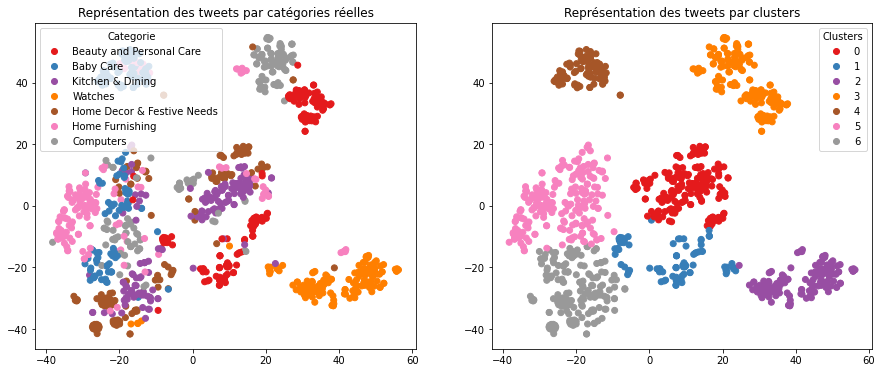

ARI :  0.3309


In [46]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

### b. BERT hub Tensorflow

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

sentences = data['processed_text_dl'].to_list()

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

## V - Universal Sentence Encoder (USE) <a class="anchor" id="6-bullet"></a>

In [47]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [48]:
batch_size = 10
sentences = data['processed_text_dl'].to_list()

In [49]:
features_USE = feature_USE_fct(sentences, batch_size, embed)

In [50]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI :  0.406 time :  17.0


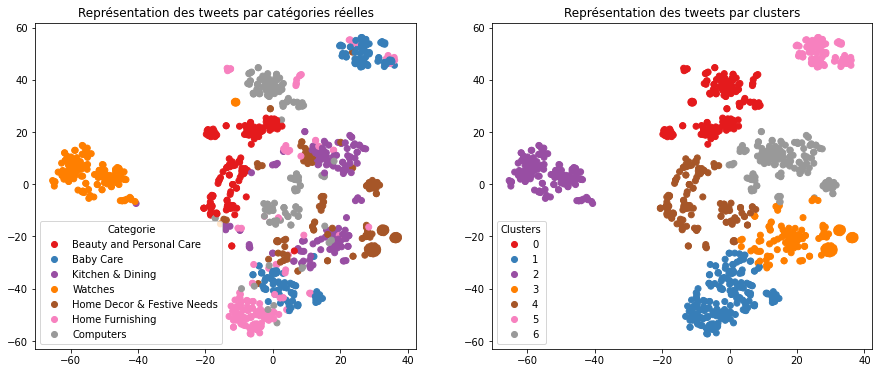

ARI :  0.406


In [51]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

# 2. Models with Spacy <a class="anchor" id="7-bullet"></a>

## I - Preprocessing <a class="anchor" id="8-bullet"></a>

In [52]:
import spacy

In [53]:
nlp = spacy.load("en_core_web_sm")

In [54]:
docs = nlp.pipe(data['description'])

In [55]:
total_words = {}

for doc in docs:
    for token in doc:
        total_words[token] = token.text

In [56]:
tmp = pd.Series(total_words).value_counts()
tmp

.          4434
,          2996
of         1663
-          1499
and        1167
           ... 
god           1
wisdom        1
deva          1
1399          1
Rs.1333       1
Length: 8058, dtype: int64

In [57]:
total_words_values = [value for value in total_words.values()]

In [58]:
# Looking number of words and unique words before preprocessing

print("Number of words : {:,}".format(len(total_words_values)))
print("Number of unique words : {:,}".format(len(set(total_words_values))))

Number of words : 94,769
Number of unique words : 8,058


In [59]:
# Setting list of unique words
list_rare_words = list(tmp[tmp == 1].index)

In [60]:
len(list_rare_words)

2797

In [61]:
# Processing

data['spacy_processed_text'] = data['description'].apply(lambda p : spacy_process_text(p, model="en_core_web_sm", rejoin=True, apply_stopwords=True, list_rare_words=list_rare_words, min_len_word=3, force_is_alpha=True))

In [62]:
docs = nlp.pipe(data['spacy_processed_text'])

In [63]:
total_words = {}

for doc in docs:
    for token in doc:
        total_words[token] = token.text

In [64]:
tmp = pd.Series(total_words).value_counts()
tmp

product         857
free            618
buy             583
delivery        567
genuine         564
               ... 
specific          1
altered           1
additionally      1
danger            1
digisol           1
Length: 3636, dtype: int64

In [65]:
total_words_values = [value for value in total_words.values()]

In [66]:
# Looking number of words and unique words before preprocessing

print("Number of words : {:,}".format(len(total_words_values)))
print("Number of unique words : {:,}".format(len(set(total_words_values))))

Number of words : 48,242
Number of unique words : 3,636


In [67]:
# Looking distribution of lenghts

data['spacy_length_processed_text'] = data['spacy_processed_text'].apply(len)
data['spacy_length_processed_text'].describe()

count    1050.000000
mean      312.962857
std       289.234164
min        51.000000
25%       124.250000
50%       197.500000
75%       411.500000
max      2112.000000
Name: spacy_length_processed_text, dtype: float64

## II - Bag of words <a class="anchor" id="9-bullet"></a>

In [68]:
data['primary_category'] = data['product_category_tree'].apply(lambda p : p.replace('[', '').replace('"', '').split('>>')[0].strip())

In [69]:
l_cat = list(set(data['primary_category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['primary_category'])) for i in range(len(data))]

catégories :  ['Beauty and Personal Care', 'Baby Care', 'Kitchen & Dining', 'Watches', 'Home Decor & Festive Needs', 'Home Furnishing', 'Computers']


In [70]:
# creating bag of words (CountVectorizer and Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'spacy_processed_text'
cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])  
ctf_transform = ctf.transform(data[feat])

In [71]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)

CountVectorizer : 
-----------------
ARI :  0.3733 time :  18.0

Tf-idf : 
--------
ARI :  0.4322 time :  17.0


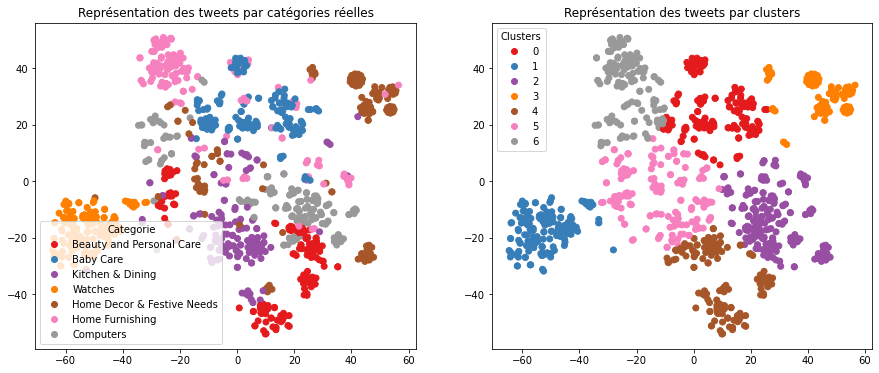

ARI :  0.4322


In [72]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)

## III - Spacy word vectors <a class="anchor" id="10-bullet"></a>

In [73]:
nlp = spacy.load("en_core_web_lg")

In [74]:
docs = nlp.pipe(data['description'])

In [75]:
features_spacy = [doc.vector for doc in docs]

In [76]:
ARI, X_tsne, labels = ARI_fct(features_spacy, l_cat, y_cat_num)

ARI :  0.3507 time :  17.0


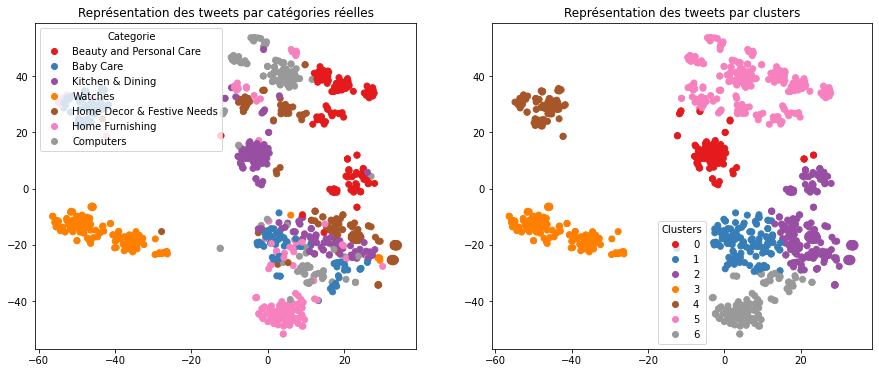

ARI :  0.3507


In [77]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, l_cat)